# Regression for Amateurs (and Humanities Majors)

![img](images/serious_man.png)

## Getting Started

In [1]:
# Some routine imports...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We'll use the `iris` dataset - one of seaborn's 'toy' datasets - because of its relative compactness, and because we can use it to talk about using linear regression to predict on **continuous** data, *as well as* using logistic regression to predict **discrete** values; the latter is better known as a **classification problem**.

In [2]:
# Load in some toy data, assign the DataFrame to `df`

df = sns.load_dataset('iris')

In [3]:
# Check it out: first, data types and size...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# ...and a few of the rows, to help us visualize

df.sample(n=10,
          random_state=138)

,sepal_length,sepal_width,petal_length,petal_width,species
58,6.6,2.9,4.6,1.3,versicolor
8,4.4,2.9,1.4,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
89,5.5,2.5,4.0,1.3,versicolor
138,6.0,3.0,4.8,1.8,virginica
2,4.7,3.2,1.3,0.2,setosa
94,5.6,2.7,4.2,1.3,versicolor
14,5.8,4.0,1.2,0.2,setosa
59,5.2,2.7,3.9,1.4,versicolor
84,5.4,3.0,4.5,1.5,versicolor


## Data Exploration

Let's start with a bird's-eye view.

Linear models are appropriate when there is a **linear relationship** between a target variable $y$ (also called a *dependent variable*, depending on what discipline you're working in) and one or more independent variables, represented by $X$.

> There are some other [assumptions](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html) that your data should satisfy before you settle on using a linear regression model, but those are a bit outside the scope of this post - follow the link for more information!

If that didn't make sense, the graph below might help clear things up.

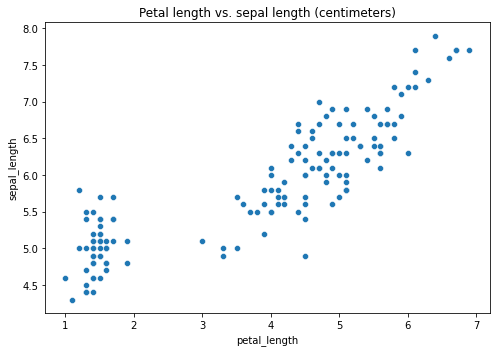

In [49]:
# Instantiate ax object, set figure size and title
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_title('Petal length vs. sepal length (centimeters)')

# Plot petal_length vs. sepal_length
sns.scatterplot(x=df.petal_length,
                y=df.sepal_length)

# Formatting for clarity and readability
plt.tight_layout()

Glancing at the scatter plot above, we can reasonably conclude that there is a *linear relationship* of some degree between `petal_length` and `sepal_length`.

## Linear Regression

In [43]:
# Instantiate linear regression class object
lr = LinearRegression()

# Dropping `sepal_length` - our target - and `species`,
# which we are not using to predict sepal length
lr.fit(X = df.drop(columns = ['sepal_length', 'species']),
       y = cont_target)

LinearRegression()

In [ ]:
preds = lr.predict(df.drop(columns = ['sepal_length', 'species']))

resids = preds - cont_target

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression